# Стратегия удержания клиентов в сети фитнес-центров

### Шаг 1. Загрузите данные

In [1]:
# Импорт необходимых библиотек
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from random import sample
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Импорт необходимых библиотек
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Импорт необходимых библиотек
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [4]:
# Загружаем датасет
gym_churn=pd.read_csv('/datasets/gym_churn.csv')

In [5]:
# Просмотрел вид и формат массивов данных
print(gym_churn.info())
display(gym_churn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


### Описание данных:

### Шаг 2. Проведите исследовательский анализ данных (EDA)

Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe())

In [6]:
# проверил основные метрики таблицы
gym_churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


В среднем мужчины и женщины одинаково ходят в зал. Клиенты ищут зал вблизи с работой или домом. Половина клиентов приходят по партнерским программам. Большая часть приходят в первый раз самостоятельно, а не по акции «приведи друга». Около 40% посещают групповые занятия. Средний возраст клиента 29 лет. Средняя суммарная выручка от других услуг фитнес-центра равна примерно 146. А в среднем клиенты приходят в зал чуть реже 2 разов в неделю.

In [7]:
# Проверил на дубликаты
gym_churn.duplicated().sum()

0

Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался 

In [8]:
gym_churn.groupby(['Churn']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


По средним значениям можно предположить, что клиенты, которые уходит в отток, чаще приходили по акции "приведи друга".

Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

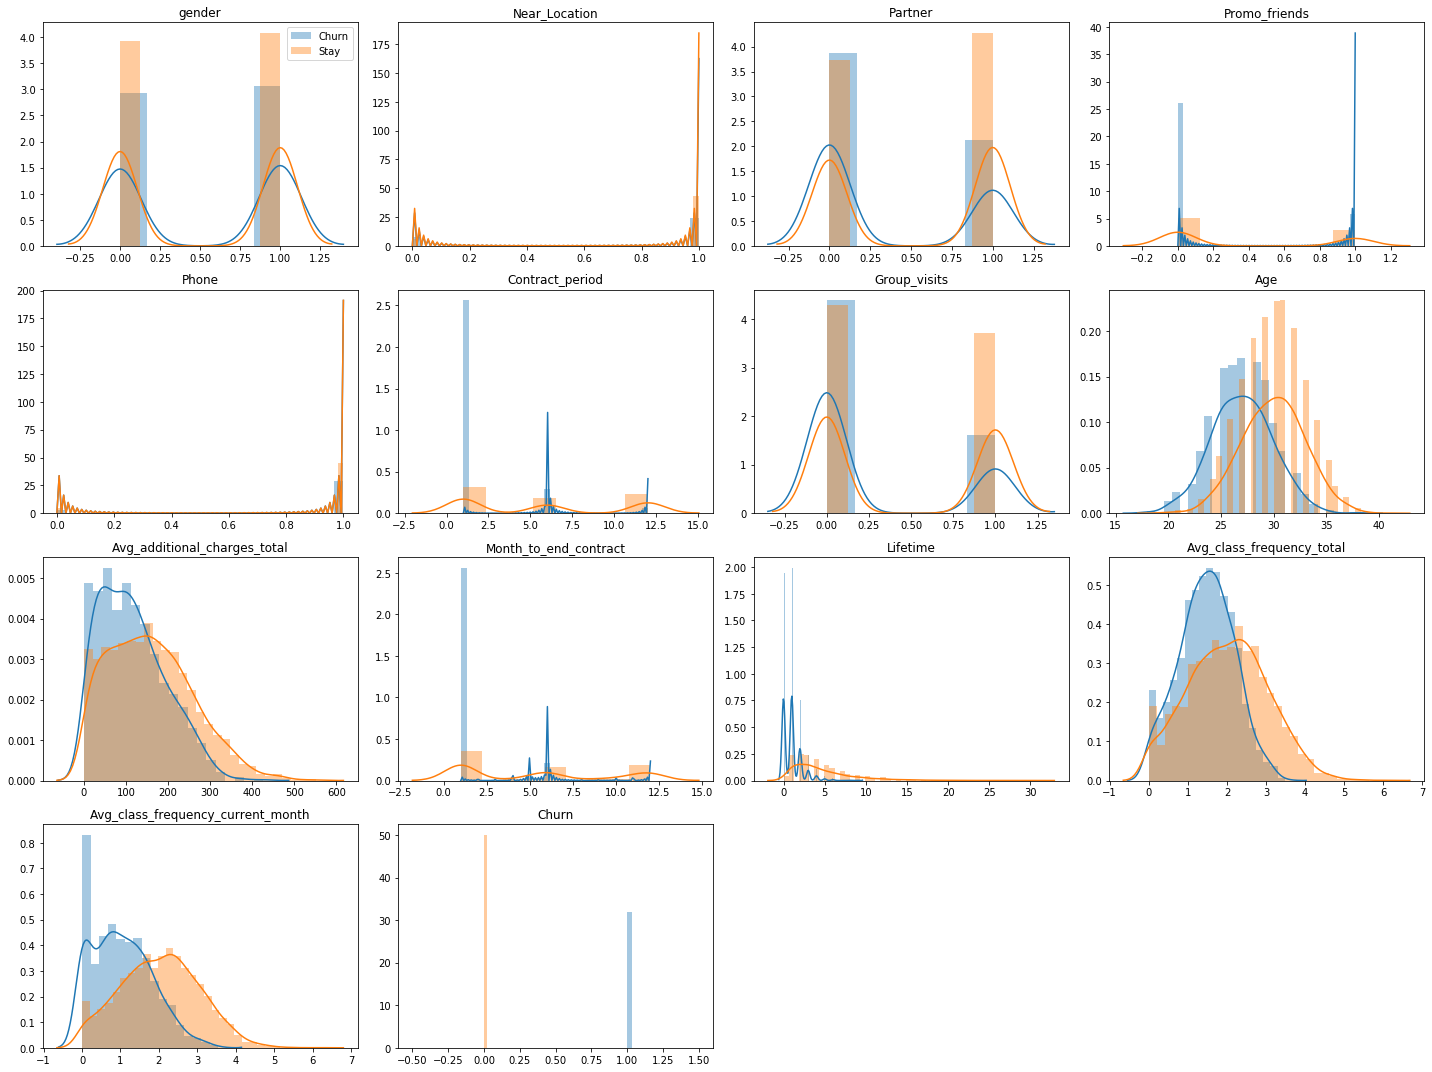

In [9]:
plt.subplots(figsize = (20, 15))
num_cols = 4
num_rows = len(gym_churn.columns.values)//num_cols +1

for i, col in enumerate(gym_churn.columns.values):
    sns.distplot(gym_churn.query('Churn==1')[col], label = 'Churn', ax = plt.subplot(num_rows, num_cols, i+1))
    sns.distplot(gym_churn.query('Churn==0')[col], label = 'Stay')
    plt.title(col)
    plt.xlabel('\n')
    plt.tight_layout()
    if i==0: plt.legend()

Из интересного можно отметить, что среди тех, кто отказывается от услуг зала, большая часть людей не пользовался акцией "приведи друга" или не занимаются по партнерской программе и тренировался самостоятельно. Также те, кто остаются, старше.

Постройте матрицу корреляций и отобразите её

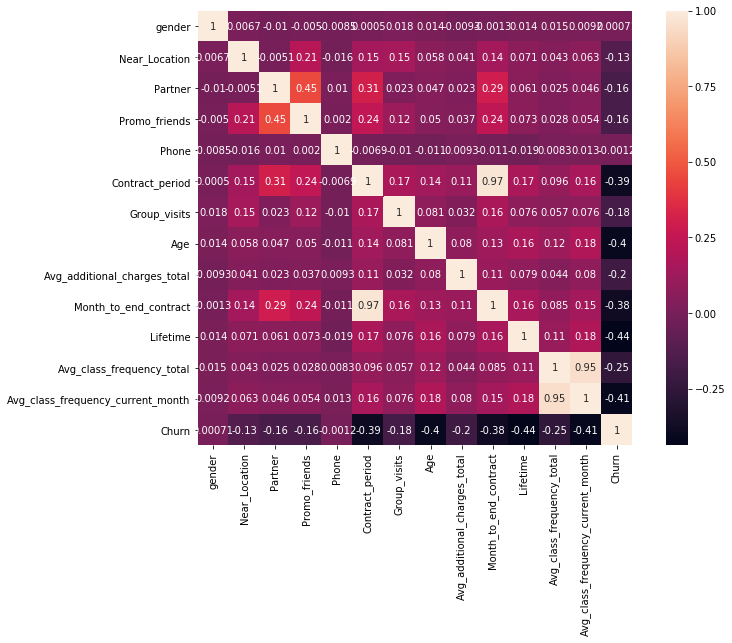

In [10]:
#построим и отрисуем матрицу корреляций
cm = gym_churn.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize = (12, 8))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot = True, square=True) 
plt.show()

Удалим 'Avg_class_frequency_total', 'Month_to_end_contract' так как у них есть высокая корреляция с другими показателями (Contract_period и Avg_class_frequency_current_month), и они могут сильно повлиять на дальнейшее исследование

In [11]:
gym_churn=gym_churn.drop(columns = ['Avg_class_frequency_total', 'Month_to_end_contract'])

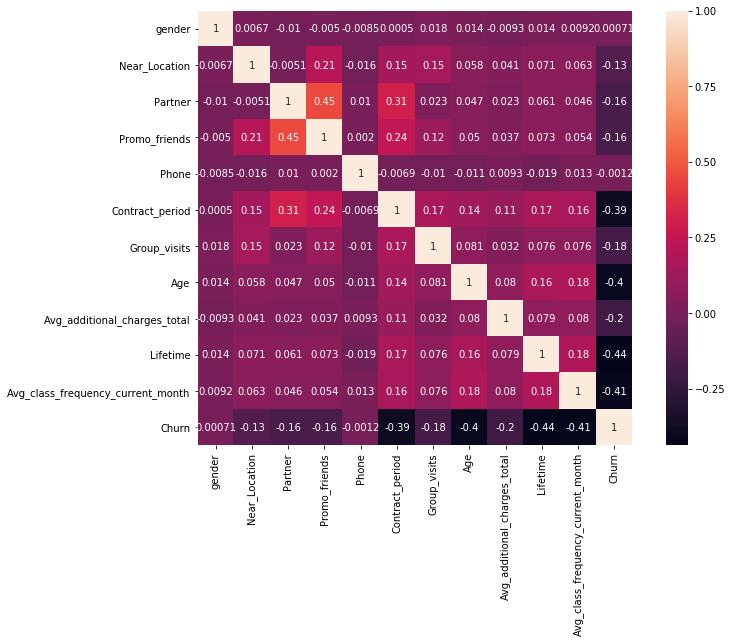

In [12]:
#построим и отрисуем матрицу корреляций
cm = gym_churn.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize = (12, 8))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot = True, square=True) 
plt.show()

Теперь данные готовы к дальнейшим манипуляциям, и высококоррелирующие показатели не испортят анализ.

### Вывод:

Данные были проанализированны и очищены. Мы описали портрет среднестатистического клиента и некоторые характеристики клиентов, которые уходят в отток или остаются.

### Шаг 3. Постройте модель прогнозирования оттока клиентов

In [13]:
# строим и учим модель
X, y = gym_churn.drop('Churn', axis =1), gym_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Обучите модель на train-выборке двумя способами: логистической регрессией и случайным лесом.

In [14]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))

In [15]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression()
# обучим модель
lr_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]
# выведем все метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.79
	F1: 0.79


In [16]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
# выведем все метрики
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.90
	Precision: 0.81
	Recall: 0.75
	F1: 0.78


Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

Доля правильных ответов одинакова, Точность немного выше у модели случайного леса, но полнота лучше у модели логистической регрессии.

Сложно однозначно ответить какая модель лучше, но я бы сказал, что показатели модели логистической регрессии лучше чем у модели случайного леса.

### Шаг 4. Сделайте кластеризацию клиентов

Провел кластеризацию объектов (клиентов):
Стандартизировал данные.

In [17]:
gym_without_churn=gym_churn.drop(columns = ['Churn'])

In [18]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(gym_without_churn)

Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму

In [19]:
linked = linkage(x_sc, method = 'ward')

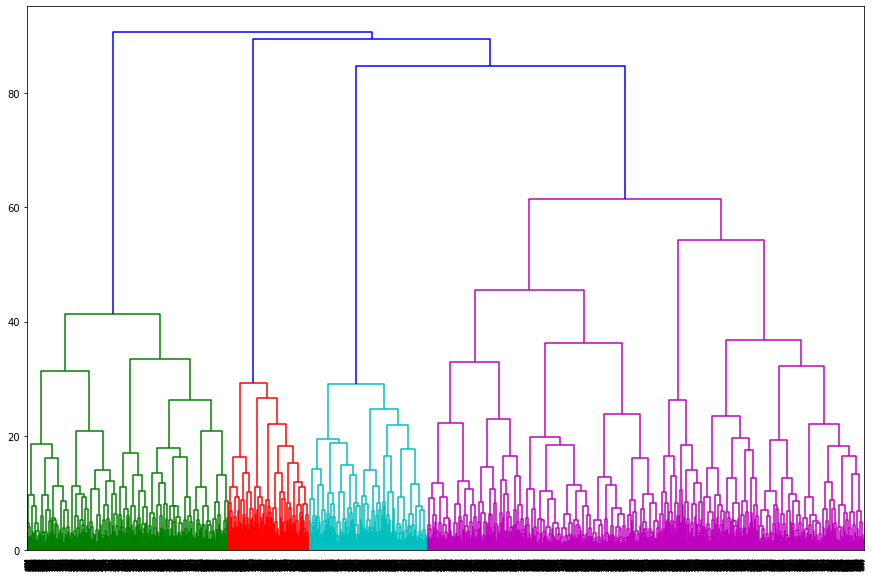

In [21]:
plt.figure(figsize=(15, 10))
dendrogram(linked, distance_sort='descending', show_leaf_counts=True, orientation='top')
plt.show() 

Получилось 4 кластера

Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5

In [22]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state = 0)
# прогнозируем кластеры для наблюдений
labels = km.fit_predict(x_sc)
# сохраняем метки кластера в поле датасета
gym_churn['labels'] = labels

Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [23]:
# выводим статистику по средним значениям признаков по кластеру
gym_churn.groupby(['labels']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_current_month,Churn
labels,,,,,,,,,,,,
0,0.496447,0.995939,0.892386,1.000000,1.0,6.922843,0.524873,29.606091,153.424651,4.283249,1.919520,0.119797
1,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
2,0.500940,1.000000,0.217105,0.072368,1.0,2.010338,0.277256,27.583647,119.339956,1.922932,1.203319,0.563910
3,0.534260,0.996028,0.379345,0.009930,1.0,6.208540,0.538232,30.699106,176.259567,5.415094,2.324220,0.014896
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839


У кластера 3 самый низкий уровень оттока (0.01). У этого кластера самый низкий показатель в параметре Promo_friends (значит их не звали друзья в зал), и высокие показатели в Group_visits, Contract_period, Age, Avg_additional_charges_total, Avg_class_frequency_current_month. Это группа клиентов должна быть самой важной и прибыльной группой для спорт-зала. Они больше остальных тренируются и больше тратяться на сопутствующие товары.

Кластер 2 имеет самый высокий уровень оттока (0.56). У них самый низкий показатель Lifetime, Avg_additional_charges_total, Age, Partner и Promo_friends. Это говорит нам о том, что данная категория клиентов не ходит в зал со знакомыми, начали заниматься совсем недавно и не готовы много тратить на сопутствующие товары в зале.

- Постройте распределения признаков для кластеров

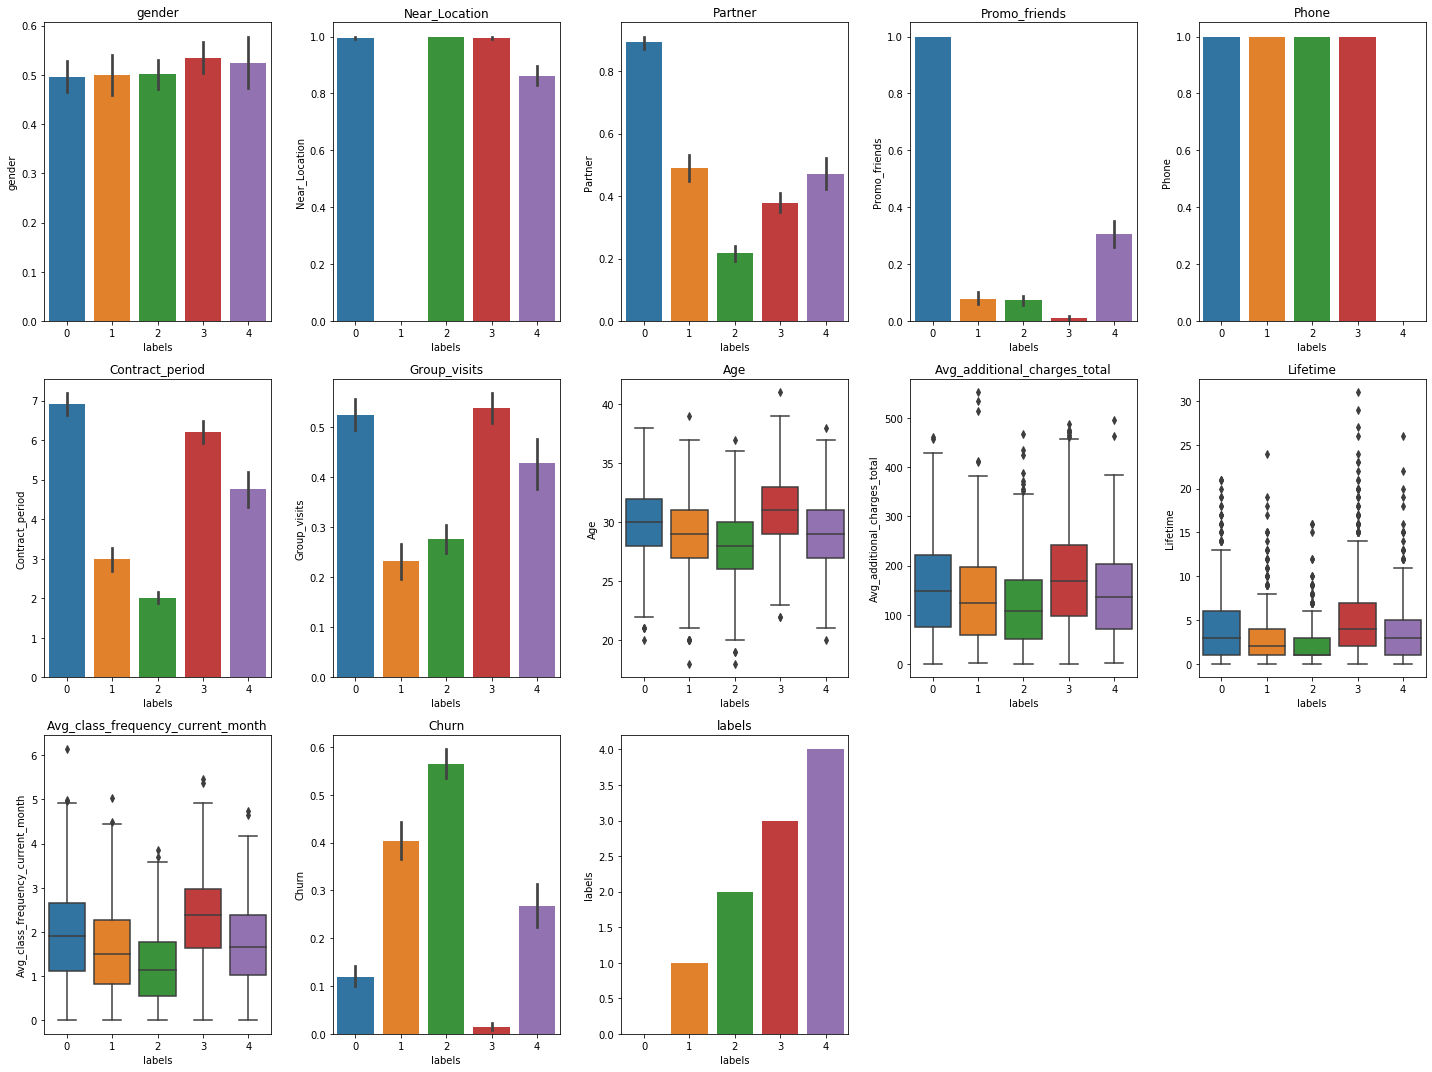

In [24]:
plt.subplots(figsize = (20, 15))
num_cols = 5
num_rows = len(gym_churn.columns.values)//num_cols +1
non_binary_vars=['Age', 'Avg_additional_charges_total', 
                 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for i, col in enumerate(gym_churn.columns.values):
    ax = plt.subplot(num_rows, num_cols, i+1)
    if col in non_binary_vars:
        sns.boxplot(data=gym_churn, x= 'labels', y=col, ax=ax)
    else:
        sns.barplot(data=gym_churn, x= 'labels', y=col, ax=ax)
    plt.title(col)
plt.tight_layout()
plt.show()

Кластер 0 имеет высокие показатели в Near_Location,Partner,Promo_friends,Contract_period, Group_visits, Avg_class_frequency_current_month,Avg_additional_charges_total и низкий уровень оттока. Такие клиенты приходят в зал группой коллегами, покупают достаточно много в зале.

У кластера 1 отличительной чертой является то, что клиенты в нем не ищут зал в близи от дома или работы. Остальные показатели не сильно отличаются от других кластеров. Имеют средний уровень оттока.

У кластера 2 особенность является высокий уровень оттока, малая сумма покупок, мало приводят друзей в зал и тренируются отдельно.

Кластер 3 практически полностью похож на кластер 0 кроме того, что они практически не зовут друзей и не пришли в зал как сотрудники партнеров спорт-зала.

Кластер 4 в основном отличается тем, что не предоставил данные своего телефона компании. Остальные показатели достаточно средние и не отличаются особенно от показателей других кластеров.

- Для каждого полученного кластера посчитайте долю оттока (методом groupby())

In [25]:
gym_churn.groupby(['labels'])['Churn'].mean()

labels
0    0.119797
1    0.403226
2    0.563910
3    0.014896
4    0.266839
Name: Churn, dtype: float64

У кластера 3 самый низкий уровень оттока (0.01). Кластер 2 имеет самый высокий уровень оттока (0.56). для них нужна разная кл ентская политика компании, чтобы эффективно с ними взаимодействовать. Остальные кластеры имет более устредненный отток.

### Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.

В начале работы обработал изначальные датасеты. Изменил формат записи числовых календарных данных.
Посчитал выручку по каждой игре во всех регионе.

Визулизировал данные с помощью гистограм.

Можно отметить, что среди тех, кто отказывается от услуг зала, большая часть людей много кто не пользовался акцией "приведи дурга" и тренировался самостоятельно. 

Модель логистической регрессии лучше для анализа, чем модель случайного леса, так как доля правильных ответов одинакова, точность немного выше у модели случайного леса, но полнота лучше у модели логистической регрессии.

При определении кластеров, мы смогли определить кластер, в котором клиенты достаточно склонны к отказу услуг спорт-зала. Благодаря этому мы можем заранее быть готовым данному событию. 

Самый проблемный кластер 2 по внешним показателям не силоьно отличается от кластера 3, который является самым прибыльным и стабильным. Самое большое их отличие в том, что в кластере 3 выше показатель Group_visits. Значит для улучшения показателей компании, нужно стимулировать клиентов из 2 кластера звать своих знакомых в зал, чтобы они проводили групповые занятия.

Также выделяется кластер 3. У этого кластера самый низкий показатель в параметре Promo_friends (значит их не звали друзья в зал), и высокие показатели в Group_visits, Contract_period, Age, Avg_additional_charges_total, Avg_class_frequency_current_month. Это группа клиентов должна быть самой важной и прибыльной группой для спорт-зала. Они больше остальных тренируются и больше тратяться на сопутствующие товары.


Кластер 0 так же как и кластер 3 стабилен и прибыльный. Изменений в политике не нужны.

Кластеры 1 и 4 имеют отличия от остальных по второстепенным показателям (удаленность от дома или работы, наличие информации о телефоне). Какие-то особенности в политике взаимодействия с данными кластерами не нужны.